In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


mp_df = pd.read_csv("data/mp_full.csv")
vp_df = pd.read_csv("data/vp_full.csv")
mp_report_counts = mp_df['misperid'].value_counts()
vp_report_counts = vp_df['misper_misperid'].value_counts()


In [21]:
location_types_results = pd.read_csv("results/1/location_types.csv")
location_types_results = location_types_results.drop(location_types_results.columns[0], axis=1)
location_types_results['number_of_mp_reports_in_a_case'] = location_types_results['misperid'].map(mp_report_counts)
location_types_results['number_of_vp_reports_in_a_case'] = location_types_results['misperid'].map(vp_report_counts)
location_types_results['number_of_all_reports_in_a_case'] = location_types_results['number_of_mp_reports_in_a_case'] + location_types_results['number_of_vp_reports_in_a_case'] 
location_types_results['loc_in_extracted_sentence_fraction'] = location_types_results['loc_in_extracted_sentence']/location_types_results['len_summ']
location_types_results ['extraced_location_in_text_fraq'] = location_types_results['pxtraced_location_in_text_hall']/ (location_types_results['pxtraced_location_in_text_hall'] + location_types_results['pxtraced_location_not_in_text_hall'] )
location_types_results['hall'] = location_types_results['len_summ'] - location_types_results['loc_in_extracted_sentence']
location_types_results['extracted_sentence_not_in_text_hall_frac'] = location_types_results['extracted_sentence_in_text_hall'] / (location_types_results['extracted_sentence_not_in_text_hall'] +location_types_results['extracted_sentence_in_text_hall']  )



In [22]:
location_types_results.columns

Index(['exact_matches', 'partial_matches', 'cosine_sim_truth',
       'missing_from_truth', 'len_summ', 'len_truth', 'total_inserted',
       'cosine_sim_loc_extract', 'loc_in_extracted_sentence',
       'pxtraced_location_not_in_text_hall', 'pxtraced_location_in_text_hall',
       'extracted_sentence_not_in_text_hall',
       'extracted_sentence_in_text_hall', 'try_count', 'misperid',
       'number_of_mp_reports_in_a_case', 'number_of_vp_reports_in_a_case',
       'number_of_all_reports_in_a_case', 'loc_in_extracted_sentence_fraction',
       'extraced_location_in_text_fraq', 'hall',
       'extracted_sentence_not_in_text_hall_frac'],
      dtype='object')

In [23]:
# Type II
location_types_results['loc_in_extracted_sentence_fraction'].describe()

count    300.000000
mean       0.579423
std        0.332937
min        0.000000
25%        0.333333
50%        0.666667
75%        0.833333
max        1.000000
Name: loc_in_extracted_sentence_fraction, dtype: float64

In [24]:
# Type II
location_types_results['extraced_location_in_text_fraq'].describe()

count    300.000000
mean       0.897164
std        0.165178
min        0.000000
25%        0.875000
50%        0.948684
75%        1.000000
max        1.000000
Name: extraced_location_in_text_fraq, dtype: float64

In [25]:
# Type III
location_types_results['extracted_sentence_not_in_text_hall_frac'].describe()

count    300.000000
mean       0.828000
std        0.283918
min        0.000000
25%        0.833333
50%        0.939338
75%        1.000000
max        1.000000
Name: extracted_sentence_not_in_text_hall_frac, dtype: float64

Descriptive Statistics:

count    300.000
mean       1.077
std        0.481
min        1.000
25%        1.000
50%        1.000
75%        1.000
max        7.000
Name: try_count, dtype: float64


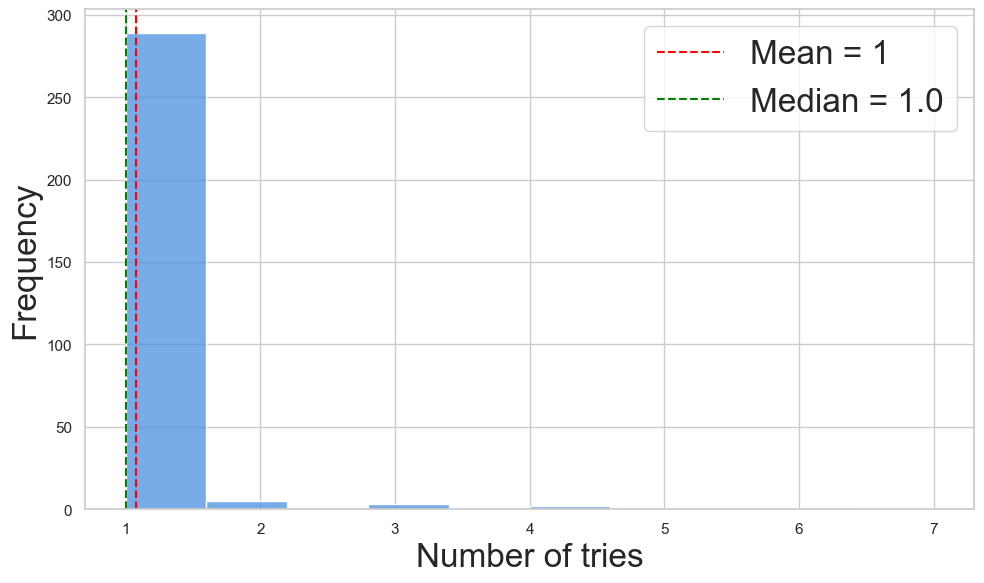

In [26]:
col = 'try_count'
df = location_types_results 
desc_stats = df[col].describe()
print("Descriptive Statistics:\n")
print(desc_stats.round(3))

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

df[col] = df[col]
sns.histplot(df[col], bins=10, kde=False, color="#4A90E2", edgecolor="white")

mean_val = df[col].mean()
median_val = df[col].median()
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean = {mean_val:.0f}')
plt.axvline(median_val, color='green', linestyle='--', label=f'Median = {median_val:.20}')

plt.xlabel("Number of tries", fontsize=24)
plt.ylabel("Frequency", fontsize=24)
plt.legend(fontsize=24)
plt.savefig("utils/plots2/try_loc_types.svg", bbox_inches='tight')
plt.tight_layout()

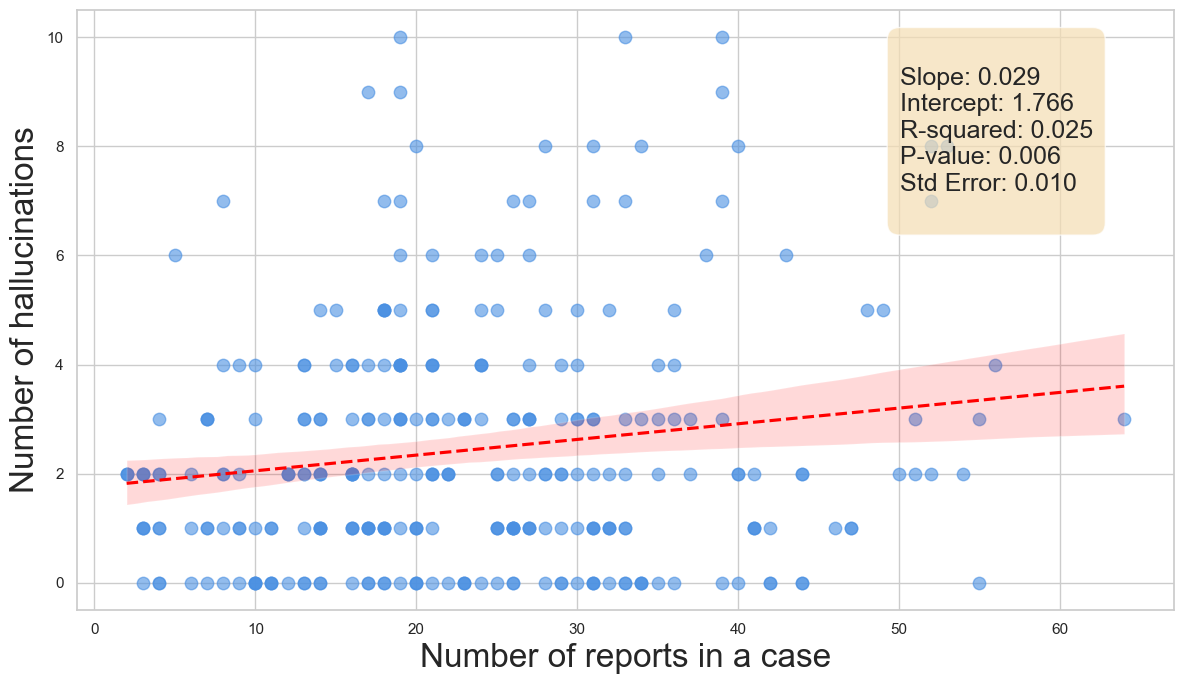

      Regression Statistics
Slope: 0.0287
Intercept: 1.7662
R-value (Correlation Coefficient): 0.1574
R-squared: 0.0248
P-value: 0.0065
Standard Error of the Estimate: 0.0105


Descriptive Statistics for X-Axis:

count    298.000
mean      23.326
std       12.276
min        2.000
25%       14.250
50%       21.000
75%       31.000
max       64.000
Name: number_of_all_reports_in_a_case, dtype: float64


Descriptive Statistics for Y-Axis:

count    300.000
mean       2.427
std        2.238
min        0.000
25%        1.000
50%        2.000
75%        3.000
max       10.000
Name: hall, dtype: float64


In [ ]:
# Type I
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

df = location_types_results.copy()
y_axis_col= 'hall'
x_axis_col = 'number_of_all_reports_in_a_case'

# --- Calculate Regression Statistics ---
# Use scipy.stats.linregress to get detailed regression results
# It's important to drop any NaN values for the calculation to work
clean_df = df[[x_axis_col, y_axis_col]].dropna()
slope, intercept, r_value, p_value, std_err = linregress(
    clean_df[x_axis_col],
    clean_df[y_axis_col]
)
r_squared = r_value**2

# --- Plotting ---
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

# Create the scatter plot
# sns.regplot already calculates and plots a regression line,
# but we calculated it separately above to get the detailed stats.
scatter_plot = sns.regplot(
    x=x_axis_col,
    y=y_axis_col,
    data=df,
    scatter_kws={'alpha': 0.6, 's': 80, 'color': '#4A90E2'}, # Style the points
    line_kws={'color': 'red', 'linestyle': '--'} # Style the regression line
)

# --- Labels & Styling ---
# plt.title(f'Relationship between {y_axis_col.title()} and {x_axis_col.title()}', fontsize=16, weight='bold')
plt.xlabel('Number of reports in a case', fontsize=24)
plt.ylabel('Number of hallucinations', fontsize=24)

# --- Add Descriptive & Regression Statistics to the plot ---
# Create a formatted multiline string with all the statistics.
# Using a triple-quoted f-string is a clean way to handle multiline text.
stats_text = f"""
Slope: {slope:.3f}
"""


# Place the text box on the plot for easy reference
plt.text(0.75, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=18,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.7))

# Save the figure with a tight bounding box


plt.tight_layout()
plt.savefig("plots/typeI.svg", bbox_inches='tight')

plt.show()


# --- Print Descriptive and Regression Statistics to Console ---
print("="*40)
print("      Regression Statistics")
print("="*40)
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-value (Correlation Coefficient): {r_value:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard Error of the Estimate: {std_err:.4f}")
print("\n" + "="*40 + "\n")

print("Descriptive Statistics for X-Axis:\n")
print(df[x_axis_col].describe().round(3))
print("\n" + "="*40 + "\n")
print("Descriptive Statistics for Y-Axis:\n")
print(df[y_axis_col].describe().round(3))


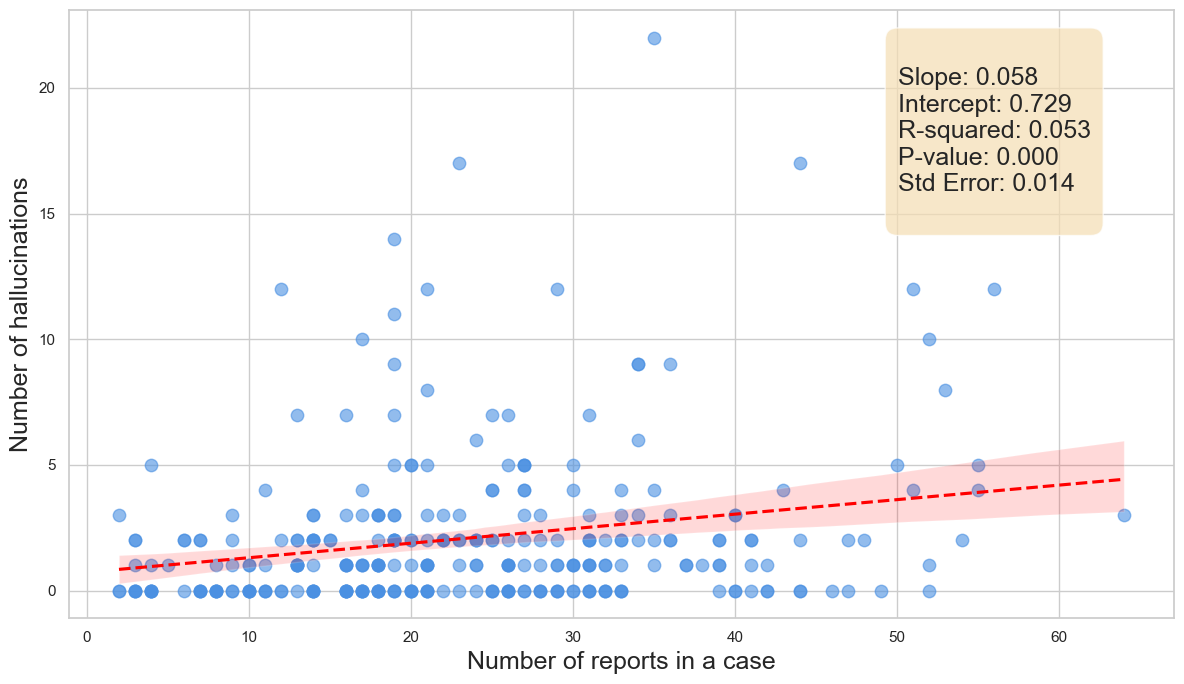

      Regression Statistics
Slope: 0.0578
Intercept: 0.7292
R-value (Correlation Coefficient): 0.2303
R-squared: 0.0530
P-value: 0.0001
Standard Error of the Estimate: 0.0142


Descriptive Statistics for X-Axis:

count    298.000
mean      23.326
std       12.276
min        2.000
25%       14.250
50%       21.000
75%       31.000
max       64.000
Name: number_of_all_reports_in_a_case, dtype: float64


Descriptive Statistics for Y-Axis:

count    300.000
mean       2.063
std        3.075
min        0.000
25%        0.000
50%        1.000
75%        2.000
max       22.000
Name: pxtraced_location_not_in_text_hall, dtype: float64


In [28]:
# Type II
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

df = location_types_results.copy()
y_axis_col= 'pxtraced_location_not_in_text_hall'
x_axis_col = 'number_of_all_reports_in_a_case'

# --- Calculate Regression Statistics ---
# Use scipy.stats.linregress to get detailed regression results
# It's important to drop any NaN values for the calculation to work
clean_df = df[[x_axis_col, y_axis_col]].dropna()
slope, intercept, r_value, p_value, std_err = linregress(
    clean_df[x_axis_col],
    clean_df[y_axis_col]
)
r_squared = r_value**2

# --- Plotting ---
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

# Create the scatter plot
# sns.regplot already calculates and plots a regression line,
# but we calculated it separately above to get the detailed stats.
scatter_plot = sns.regplot(
    x=x_axis_col,
    y=y_axis_col,
    data=df,
    scatter_kws={'alpha': 0.6, 's': 80, 'color': '#4A90E2'}, # Style the points
    line_kws={'color': 'red', 'linestyle': '--'} # Style the regression line
)

# --- Labels & Styling ---
# plt.title(f'Relationship between {y_axis_col.title()} and {x_axis_col.title()}', fontsize=16, weight='bold')
plt.xlabel('Number of reports in a case', fontsize=18)
plt.ylabel('Number of hallucinations', fontsize=18)

# --- Add Descriptive & Regression Statistics to the plot ---
# Create a formatted multiline string with all the statistics.
# Using a triple-quoted f-string is a clean way to handle multiline text.
stats_text = f"""
Slope: {slope:.3f}
Intercept: {intercept:.3f}
R-squared: {r_squared:.3f}
P-value: {p_value:.3f}
Std Error: {std_err:.3f}
"""


# Place the text box on the plot for easy reference
plt.text(0.75, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=18,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.7))

# Save the figure with a tight bounding box


plt.tight_layout()
plt.savefig("plots/typeII.svg", bbox_inches='tight')

plt.show()


# --- Print Descriptive and Regression Statistics to Console ---
print("="*40)
print("      Regression Statistics")
print("="*40)
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-value (Correlation Coefficient): {r_value:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard Error of the Estimate: {std_err:.4f}")
print("\n" + "="*40 + "\n")

print("Descriptive Statistics for X-Axis:\n")
print(df[x_axis_col].describe().round(3))
print("\n" + "="*40 + "\n")
print("Descriptive Statistics for Y-Axis:\n")
print(df[y_axis_col].describe().round(3))


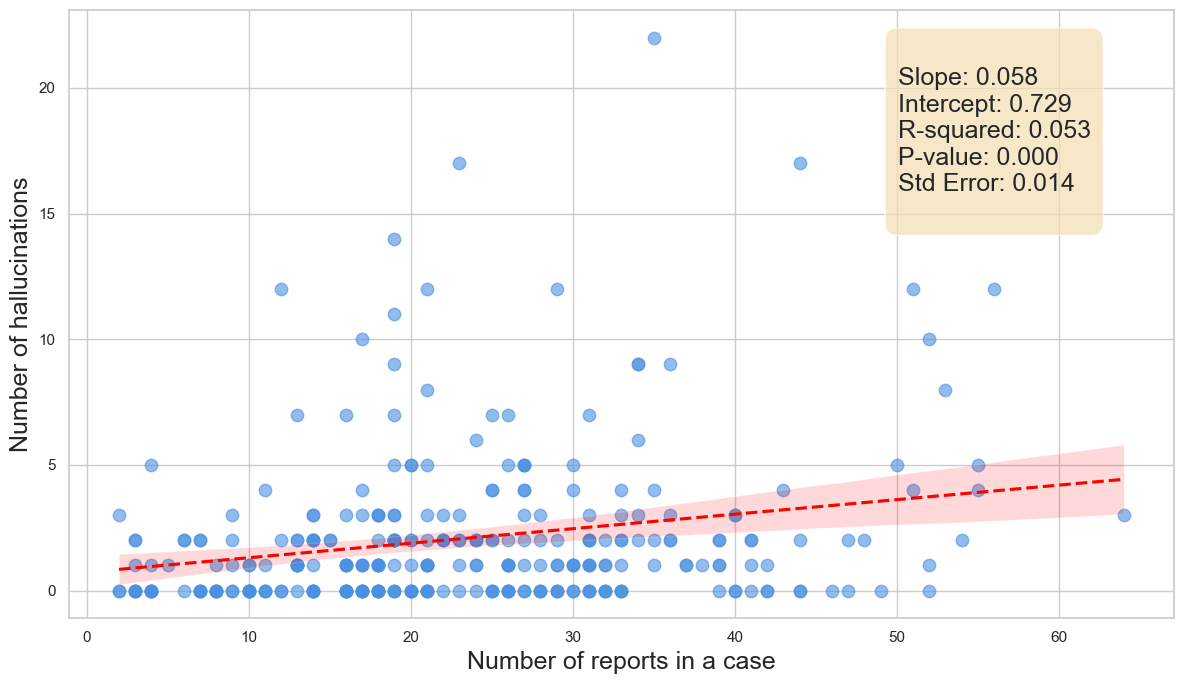

      Regression Statistics
Slope: 0.0578
Intercept: 0.7292
R-value (Correlation Coefficient): 0.2303
R-squared: 0.0530
P-value: 0.0001
Standard Error of the Estimate: 0.0142


Descriptive Statistics for X-Axis:

count    298.000
mean      23.326
std       12.276
min        2.000
25%       14.250
50%       21.000
75%       31.000
max       64.000
Name: number_of_all_reports_in_a_case, dtype: float64


Descriptive Statistics for Y-Axis:

count    300.000
mean       2.063
std        3.075
min        0.000
25%        0.000
50%        1.000
75%        2.000
max       22.000
Name: pxtraced_location_not_in_text_hall, dtype: float64


In [29]:
# Type III
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

df = location_types_results.copy()
y_axis_col= 'pxtraced_location_not_in_text_hall'
x_axis_col = 'number_of_all_reports_in_a_case'

# --- Calculate Regression Statistics ---
# Use scipy.stats.linregress to get detailed regression results
# It's important to drop any NaN values for the calculation to work
clean_df = df[[x_axis_col, y_axis_col]].dropna()
slope, intercept, r_value, p_value, std_err = linregress(
    clean_df[x_axis_col],
    clean_df[y_axis_col]
)
r_squared = r_value**2

# --- Plotting ---
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

# Create the scatter plot
# sns.regplot already calculates and plots a regression line,
# but we calculated it separately above to get the detailed stats.
scatter_plot = sns.regplot(
    x=x_axis_col,
    y=y_axis_col,
    data=df,
    scatter_kws={'alpha': 0.6, 's': 80, 'color': '#4A90E2'}, # Style the points
    line_kws={'color': 'red', 'linestyle': '--'} # Style the regression line
)

# --- Labels & Styling ---
# plt.title(f'Relationship between {y_axis_col.title()} and {x_axis_col.title()}', fontsize=16, weight='bold')
plt.xlabel('Number of reports in a case', fontsize=18)
plt.ylabel('Number of hallucinations', fontsize=18)

# --- Add Descriptive & Regression Statistics to the plot ---
# Create a formatted multiline string with all the statistics.
# Using a triple-quoted f-string is a clean way to handle multiline text.
stats_text = f"""
Slope: {slope:.3f}
Intercept: {intercept:.3f}
R-squared: {r_squared:.3f}
P-value: {p_value:.3f}
Std Error: {std_err:.3f}
"""


# Place the text box on the plot for easy reference
plt.text(0.75, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=18,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.7))

# Save the figure with a tight bounding box


plt.tight_layout()
plt.savefig("plots/typeIII.svg", bbox_inches='tight')

plt.show()


# --- Print Descriptive and Regression Statistics to Console ---
print("="*40)
print("      Regression Statistics")
print("="*40)
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-value (Correlation Coefficient): {r_value:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard Error of the Estimate: {std_err:.4f}")
print("\n" + "="*40 + "\n")

print("Descriptive Statistics for X-Axis:\n")
print(df[x_axis_col].describe().round(3))
print("\n" + "="*40 + "\n")
print("Descriptive Statistics for Y-Axis:\n")
print(df[y_axis_col].describe().round(3))


In [30]:
location_types_results

,exact_matches,partial_matches,cosine_sim_truth,missing_from_truth,len_summ,len_truth,total_inserted,cosine_sim_loc_extract,loc_in_extracted_sentence,pxtraced_location_not_in_text_hall,...,extracted_sentence_in_text_hall,try_count,misperid,number_of_mp_reports_in_a_case,number_of_vp_reports_in_a_case,number_of_all_reports_in_a_case,loc_in_extracted_sentence_fraction,extraced_location_in_text_fraq,hall,extracted_sentence_not_in_text_hall_frac
0,1,0,0,0,3,1,3,0.394331,0,1,...,0,1,42,2,2.0,4.0,0.000000,0.875000,3,0.000000
1,2,0,0,4,7,6,7,0.460805,4,12,...,36,1,51,16,13.0,29.0,0.571429,0.727273,3,0.818182
2,1,0,0,1,6,2,6,0.540317,5,1,...,8,1,157,5,8.0,13.0,0.833333,0.916667,1,0.666667
3,1,1,0,1,5,3,5,0.461765,1,11,...,16,1,190,15,4.0,19.0,0.200000,0.388889,4,0.888889
4,3,0,0,1,9,3,9,0.376552,5,2,...,15,1,212,14,5.0,19.0,0.555556,0.875000,4,0.937500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,5,0,0,0,10,5,6,0.340257,0,0,...,10,1,9886,6,13.0,19.0,0.000000,1.000000,10,1.000000
296,0,0,0,0,5,0,5,0.410054,3,2,...,30,1,9906,11,8.0,19.0,0.600000,0.937500,2,0.937500
297,0,0,1,1,5,2,4,0.388200,4,0,...,16,1,9950,9,8.0,17.0,0.800000,1.000000,1,1.000000
298,12,0,0,0,7,6,6,0.337520,0,1,...,0,1,9960,19,20.0,39.0,0.000000,0.937500,7,0.000000


In [31]:
denom = location_types_results['exact_matches'] + location_types_results['total_inserted'] + location_types_results['partial_matches']+ location_types_results['cosine_sim_truth']
location_types_results['exact_precision'] = location_types_results['exact_matches'] / denom
location_types_results['part_precision'] =  (location_types_results['exact_matches'] + location_types_results['partial_matches']) / denom
location_types_results['part_cos_precision'] = (location_types_results['exact_matches'] +  location_types_results['partial_matches'] + location_types_results['cosine_sim_truth']  )/ denom

recall_denom =  (location_types_results['exact_matches']  + location_types_results['missing_from_truth'] + location_types_results['partial_matches'] +location_types_results['cosine_sim_truth'] )
location_types_results['recall'] = location_types_results['exact_matches'] / recall_denom
location_types_results['part_recall'] = (location_types_results['partial_matches']  + location_types_results['exact_matches'])/ recall_denom
location_types_results['part_cos_recall'] =  (location_types_results['partial_matches']  + location_types_results['exact_matches'] +location_types_results['cosine_sim_truth'] )/ recall_denom


In [32]:
metrics_cols = ['exact_precision', 'part_precision', 'part_cos_precision', 'recall', 'part_recall','part_cos_recall'] 


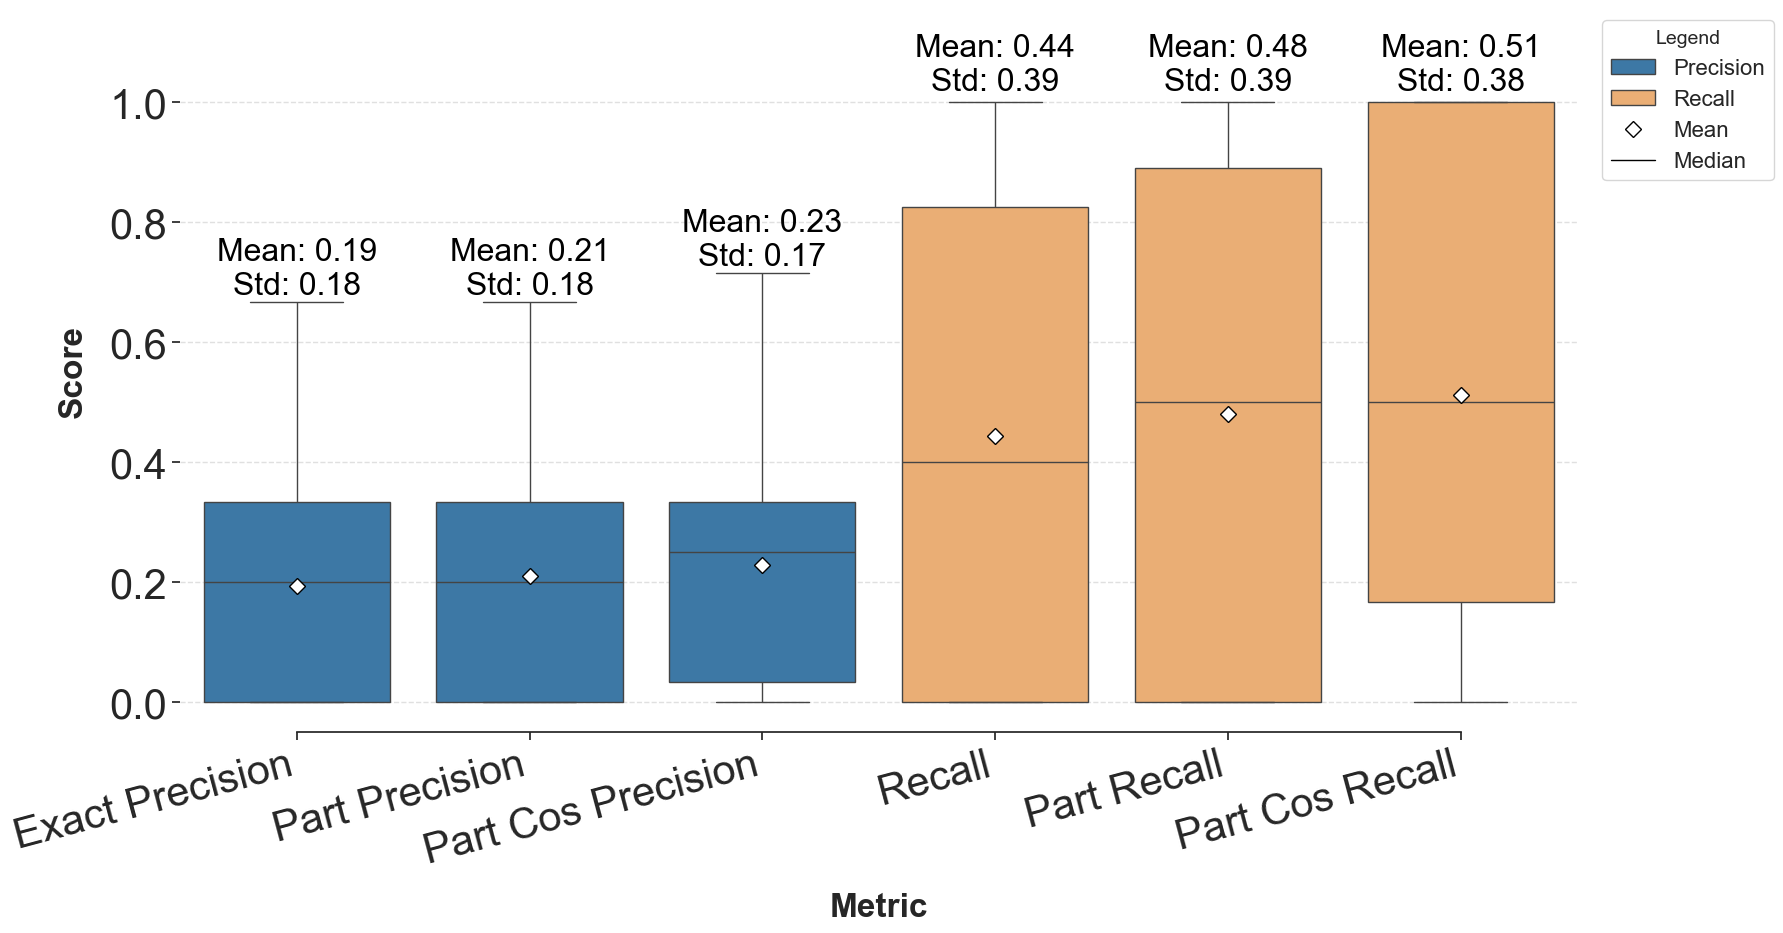

In [33]:
from utils.ploting import create_professional_boxplot

create_professional_boxplot(location_types_results, metrics_cols, "", "", "loctypes")

In [34]:
location_types_results['result_percentage_exact'] = location_types_results['exact_matches'] / location_types_results['len_truth']
location_types_results['result_percentage_partial'] = location_types_results['partial_matches'] / location_types_results['len_truth']

location_types_results['result_percentage_cosine_sim_truth'] = location_types_results['cosine_sim_truth'] / location_types_results['len_truth']
location_types_results

,exact_matches,partial_matches,cosine_sim_truth,missing_from_truth,len_summ,len_truth,total_inserted,cosine_sim_loc_extract,loc_in_extracted_sentence,pxtraced_location_not_in_text_hall,...,extracted_sentence_not_in_text_hall_frac,exact_precision,part_precision,part_cos_precision,recall,part_recall,part_cos_recall,result_percentage_exact,result_percentage_partial,result_percentage_cosine_sim_truth
0,1,0,0,0,3,1,3,0.394331,0,1,...,0.000000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0
1,2,0,0,4,7,6,7,0.460805,4,12,...,0.818182,0.222222,0.222222,0.222222,0.333333,0.333333,0.333333,0.333333,0.000000,0.0
2,1,0,0,1,6,2,6,0.540317,5,1,...,0.666667,0.142857,0.142857,0.142857,0.500000,0.500000,0.500000,0.500000,0.000000,0.0
3,1,1,0,1,5,3,5,0.461765,1,11,...,0.888889,0.142857,0.285714,0.285714,0.333333,0.666667,0.666667,0.333333,0.333333,0.0
4,3,0,0,1,9,3,9,0.376552,5,2,...,0.937500,0.250000,0.250000,0.250000,0.750000,0.750000,0.750000,1.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,5,0,0,0,10,5,6,0.340257,0,0,...,1.000000,0.454545,0.454545,0.454545,1.000000,1.000000,1.000000,1.000000,0.000000,0.0
296,0,0,0,0,5,0,5,0.410054,3,2,...,0.937500,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
297,0,0,1,1,5,2,4,0.388200,4,0,...,1.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.500000,0.000000,0.000000,0.5
298,12,0,0,0,7,6,6,0.337520,0,1,...,0.000000,0.666667,0.666667,0.666667,1.000000,1.000000,1.000000,2.000000,0.000000,0.0


Descriptive Statistics:

count    294.000
mean       0.525
std        0.582
min        0.000
25%        0.000
50%        0.400
75%        1.000
max        4.750
Name: result_percentage_exact, dtype: float64


<module 'matplotlib.pyplot' from '/Users/polabedzka/Desktop/masters/camridge/THESIS/evaluation_pipeline/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

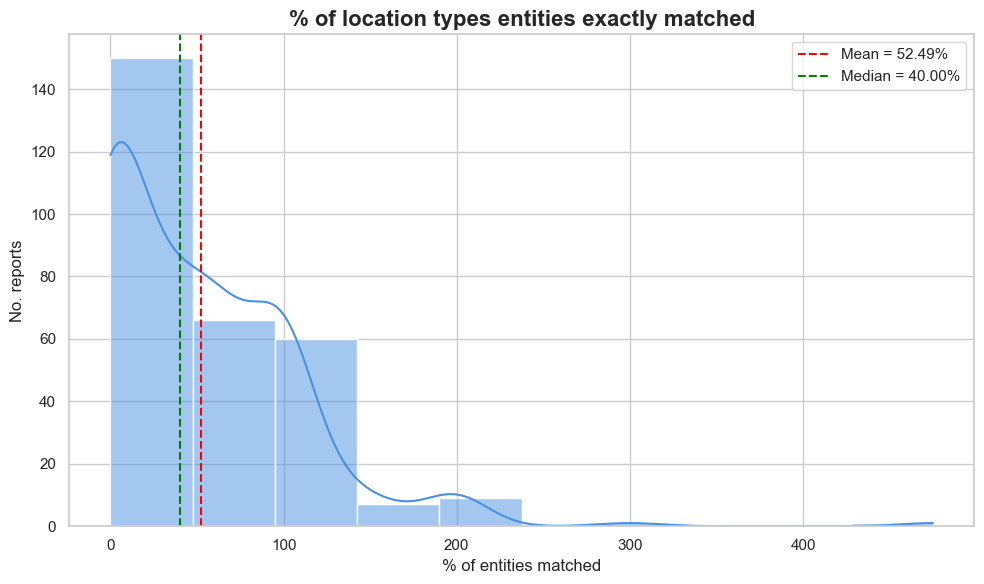

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_distrib(df, col, title):
    desc_stats = df[col].describe()
    print("Descriptive Statistics:\n")
    print(desc_stats.round(3))

    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10, 6))

    df[col] = df[col]*100
    sns.histplot(df[col], bins=10, kde=True, color="#4A90E2", edgecolor="white")

    # --- Add Mean & Median Lines ---
    mean_val = df[col].mean()
    median_val = df[col].median()
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean = {mean_val:.2f}%')
    plt.axvline(median_val, color='green', linestyle='--', label=f'Median = {median_val:.2f}%')

    # --- Labels & Styling ---
    plt.title(title, fontsize=16, weight='bold')
    plt.xlabel("% of entities matched", fontsize=12)
    plt.ylabel("No. reports", fontsize=12)
    plt.legend()
    plt.tight_layout()
    
    return plt
plot_distrib(location_types_results,"result_percentage_exact", "% of location types entities exactly matched")

Descriptive Statistics:

count    294.000
mean       0.036
std        0.121
min        0.000
25%        0.000
50%        0.000
75%        0.000
max        1.000
Name: result_percentage_partial, dtype: float64


<module 'matplotlib.pyplot' from '/Users/polabedzka/Desktop/masters/camridge/THESIS/evaluation_pipeline/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

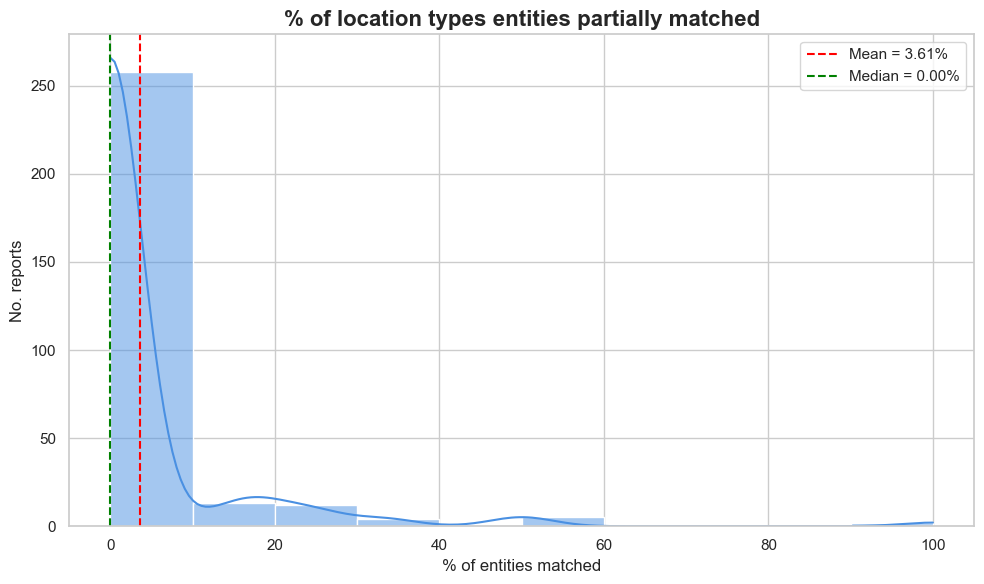

In [36]:
plot_distrib(location_types_results, 'result_percentage_partial', "% of location types entities partially matched")

Descriptive Statistics:

count    294.000
mean       0.032
std        0.109
min        0.000
25%        0.000
50%        0.000
75%        0.000
max        1.000
Name: result_percentage_cosine_sim_truth, dtype: float64


<module 'matplotlib.pyplot' from '/Users/polabedzka/Desktop/masters/camridge/THESIS/evaluation_pipeline/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

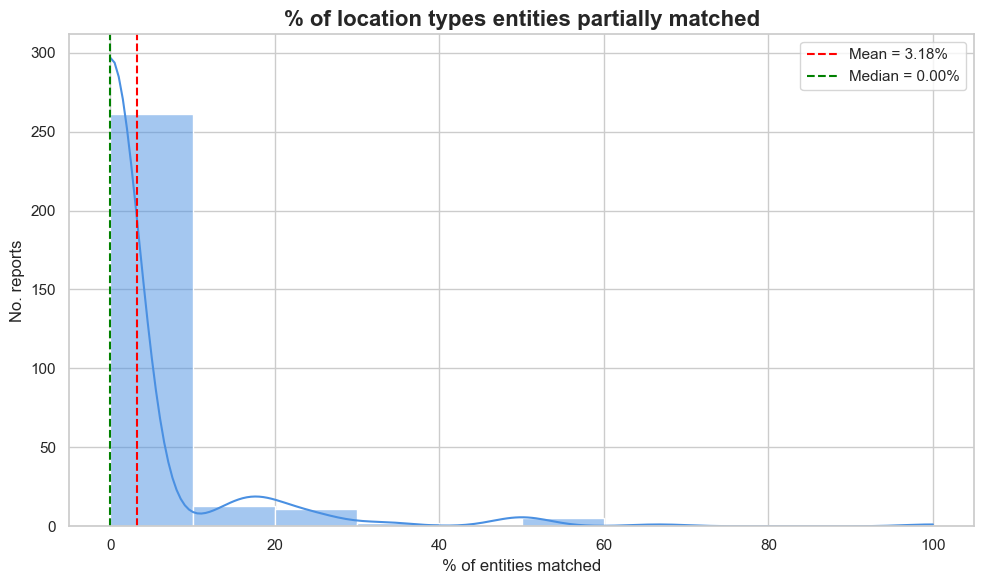

In [37]:
plot_distrib(location_types_results, 'result_percentage_cosine_sim_truth', "% of location types entities partially matched")

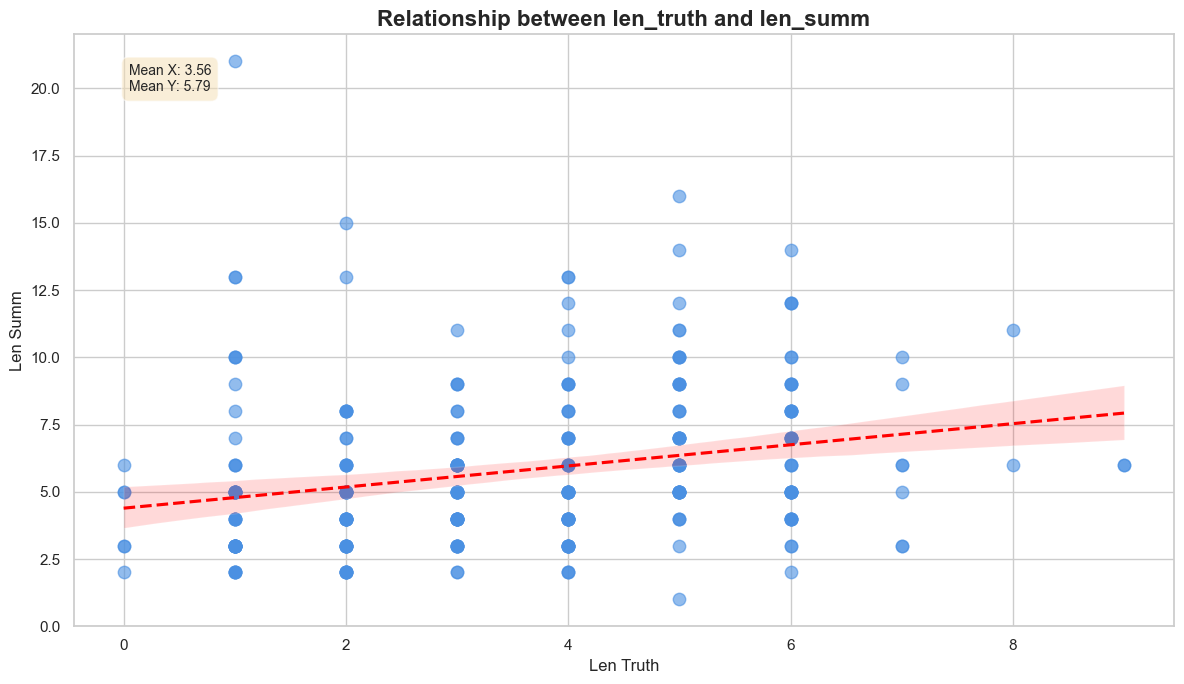

Descriptive Statistics for X-Axis:

count    300.000
mean       3.557
std        1.872
min        0.000
25%        2.000
50%        4.000
75%        5.000
max        9.000
Name: len_truth, dtype: float64


Descriptive Statistics for Y-Axis:

count    300.000
mean       5.787
std        2.887
min        1.000
25%        4.000
50%        5.000
75%        7.000
max       21.000
Name: len_summ, dtype: float64


In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = location_types_results.copy()

y_axis_col= 'len_summ'
x_axis_col = 'len_truth'

# --- Plotting ---
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

# Create the scatter plot
# Using regplot adds a regression line to show the trend
scatter_plot = sns.regplot(
    x=df[x_axis_col],
    y=df[y_axis_col],
    scatter_kws={'alpha': 0.6, 's': 80, 'color': '#4A90E2'}, # Style the points
    line_kws={'color': 'red', 'linestyle': '--'} # Style the regression line
)

# --- Labels & Styling ---
plt.title(f'Relationship between {x_axis_col} and {y_axis_col}', fontsize=16, weight='bold')
plt.xlabel(x_axis_col.replace('_', ' ').title(), fontsize=12)
plt.ylabel(y_axis_col.replace('_', ' ').title(), fontsize=12)

# --- Add Descriptive Statistics to the plot ---
# You can uncomment this section to display stats on the plot if you wish
x_mean = df[x_axis_col].mean()
y_mean = df[y_axis_col].mean()
stats_text = (f"Mean X: {x_mean:.2f}\n"
              f"Mean Y: {y_mean:.2f}")
plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))


plt.tight_layout()
plt.show()

# --- Print Descriptive Statistics to Console ---
print("Descriptive Statistics for X-Axis:\n")
print(df[x_axis_col].describe().round(3))
print("\n" + "="*40 + "\n")
print("Descriptive Statistics for Y-Axis:\n")
print(df[y_axis_col].describe().round(3))


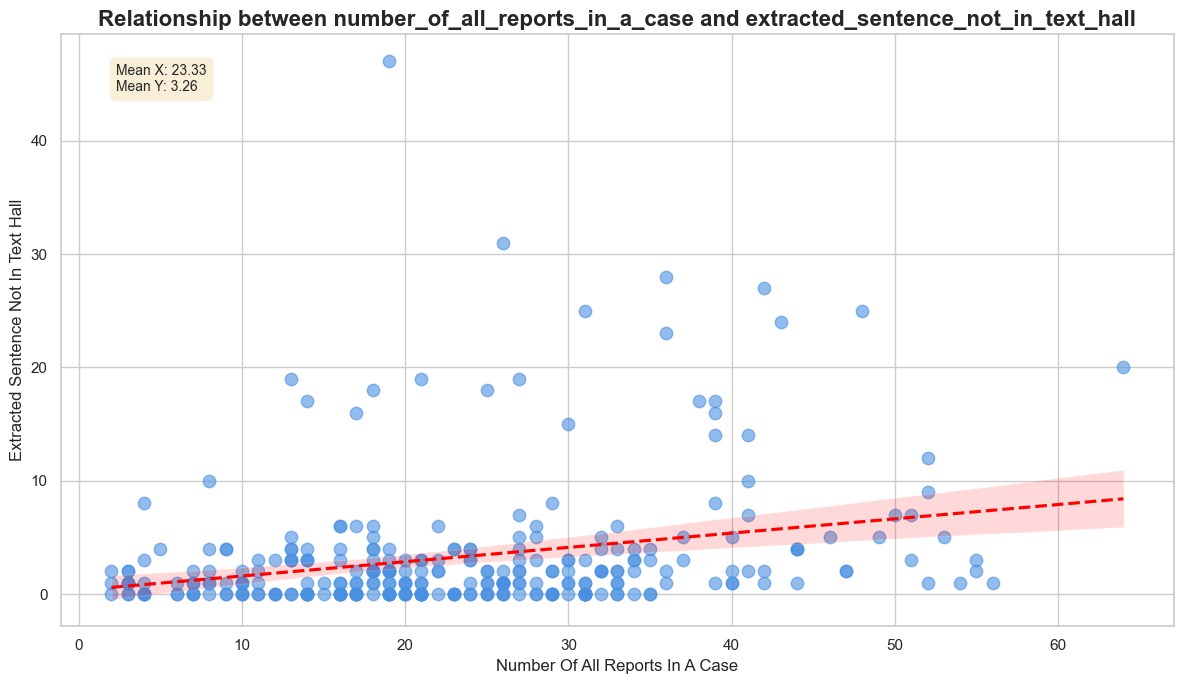

Descriptive Statistics for X-Axis:

count    298.000
mean      23.326
std       12.276
min        2.000
25%       14.250
50%       21.000
75%       31.000
max       64.000
Name: number_of_all_reports_in_a_case, dtype: float64


Descriptive Statistics for Y-Axis:

count    300.000
mean       3.263
std        5.827
min        0.000
25%        0.000
50%        1.000
75%        3.000
max       47.000
Name: extracted_sentence_not_in_text_hall, dtype: float64


In [39]:
# Type III hall
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = location_types_results.copy()

y_axis_col= 'extracted_sentence_not_in_text_hall'
x_axis_col = 'number_of_all_reports_in_a_case'

# --- Plotting ---
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

# Create the scatter plot
# Using regplot adds a regression line to show the trend
scatter_plot = sns.regplot(
    x=df[x_axis_col],
    y=df[y_axis_col],
    scatter_kws={'alpha': 0.6, 's': 80, 'color': '#4A90E2'}, # Style the points
    line_kws={'color': 'red', 'linestyle': '--'} # Style the regression line
)

# --- Labels & Styling ---
plt.title(f'Relationship between {x_axis_col} and {y_axis_col}', fontsize=16, weight='bold')
plt.xlabel(x_axis_col.replace('_', ' ').title(), fontsize=12)
plt.ylabel(y_axis_col.replace('_', ' ').title(), fontsize=12)

# --- Add Descriptive Statistics to the plot ---
# You can uncomment this section to display stats on the plot if you wish
x_mean = df[x_axis_col].mean()
y_mean = df[y_axis_col].mean()
stats_text = (f"Mean X: {x_mean:.2f}\n"
              f"Mean Y: {y_mean:.2f}")
plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))


plt.tight_layout()
plt.show()

# --- Print Descriptive Statistics to Console ---
print("Descriptive Statistics for X-Axis:\n")
print(df[x_axis_col].describe().round(3))
print("\n" + "="*40 + "\n")
print("Descriptive Statistics for Y-Axis:\n")
print(df[y_axis_col].describe().round(3))
